In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
df=pd.read_csv('pepsico_products.csv')
df.shape

(223, 6)

In [14]:
df.sample(5)

,Product Name,Year Launched,Status,Region Served,Category,Ownership
67,Simba,1957,Active,South Africa,Snack,PepsiCo (partial)
45,Pepsi Max,1993,Active,Worldwide,Cola,PepsiCo
190,Looza Ace,2021,Active,Belgium,Beverages,PepsiCo (partial)
217,Naked Well Being,2011,Discontinued,North America,Beverages,PepsiCo (partial)
0,Pepsi,1893,Active,Worldwide,Cola,PepsiCo


In [13]:
df['Status'].value_counts()

Active          179
Discontinued     44
Name: Status, dtype: int64

In [15]:
df['Region Served'].value_counts()

North America                    159
Worldwide                         16
Mexico                            11
United Kingdom                     8
Japan                              6
Australia                          5
Belgium                            4
Brazil                             4
Spain                              2
France                             2
Europe                             2
United States (New Hampshire)      1
United States (California)         1
South Africa                       1
Canada                             1
Name: Region Served, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   223 non-null    object
 1   Year Launched  223 non-null    int64 
 2   Status         223 non-null    object
 3   Region Served  223 non-null    object
 4   Category       223 non-null    object
 5   Ownership      223 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.6+ KB


In [18]:
df.describe()

,Year Launched
count,223.000000
mean,1990.412556
std,29.187345
min,1863.000000
25%,1983.000000
50%,2001.000000
75%,2009.000000
max,2021.000000


# Look in for duplicate and removing them

In [20]:
df_duplicated = df.duplicated()
mask = df_duplicated == 1
df_duplicated = df[mask]
print(df.size)
print(df_duplicated.size)

1338
192


In [ ]:
print(df.shape)
print(df.drop_duplicates().shape)

We can see that there are 32 duplicated rows and I will remove them. The new dataframe will have 191 rows instead of 223.

In [22]:
df = df.drop_duplicates()

In [23]:
df.isnull().value_counts()

Product Name  Year Launched  Status  Region Served  Category  Ownership
False         False          False   False          False     False        191
dtype: int64

Now, we know that we don't have any duplicate nor null values. We can continue our analysis.

# Visualizing the data and answering the question

Text(0.5, 1.0, 'Status')

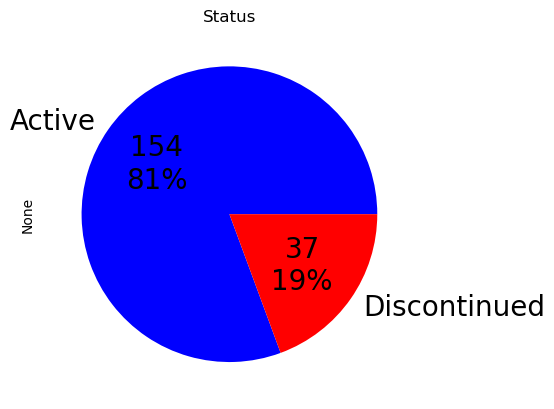

In [26]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('Status').size().plot(kind='pie', autopct=label_function, textprops={'fontsize':20}, colors=['blue', 'red'])

plt.title('Status')

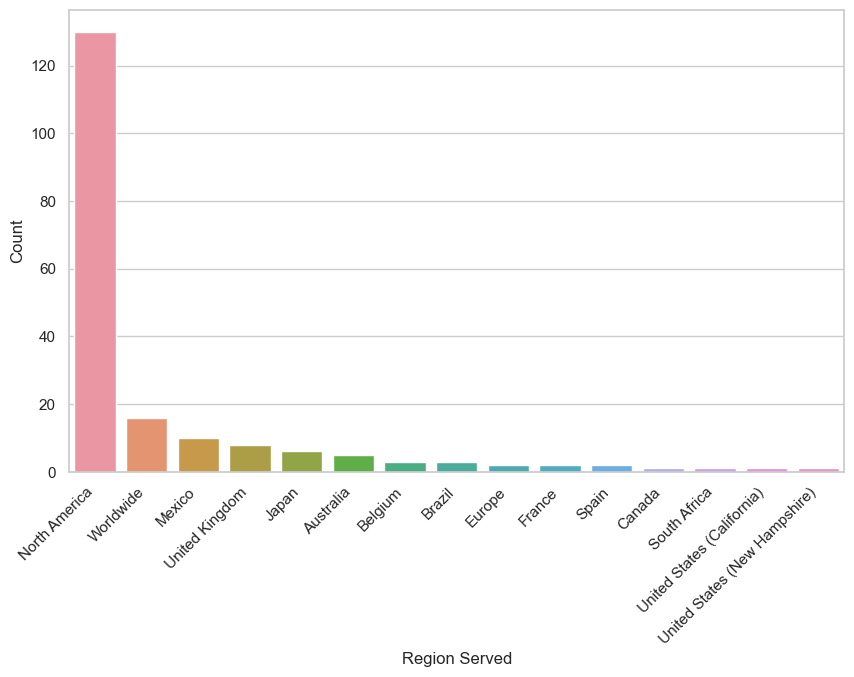

In [27]:
Regions = df.groupby(['Region Served']).agg(Count = pd.NamedAgg(column = 'Product Name',aggfunc = 'count')).sort_values(by = 'Count',ascending = False).reset_index()

plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid", palette= 'pastel')
sns.barplot(data = Regions,
            x = 'Region Served',
            y = 'Count')

plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

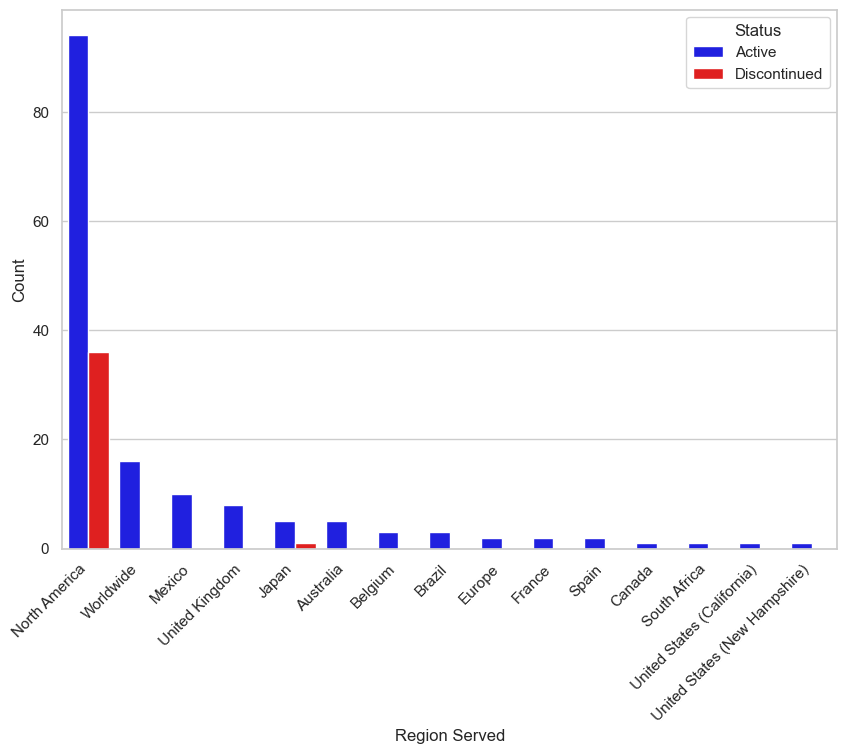

In [28]:
RegionsStatus = df.groupby(['Region Served', 'Status']).agg(Count = pd.NamedAgg(column = 'Product Name', aggfunc = 'count')).sort_values(by = 'Count', ascending = False).reset_index()

plt.figure(figsize=(10, 7))
sns.set_theme(style='whitegrid', palette=('blue', 'red'))
sns.barplot(data = RegionsStatus,
           x = 'Region Served',
           y = 'Count',
           hue = 'Status')

plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

In [29]:
RegionsStatus.head(10)

,Region Served,Status,Count
0,North America,Active,94
1,North America,Discontinued,36
2,Worldwide,Active,16
3,Mexico,Active,10
4,United Kingdom,Active,8
5,Japan,Active,5
6,Australia,Active,5
7,Belgium,Active,3
8,Brazil,Active,3
9,Europe,Active,2


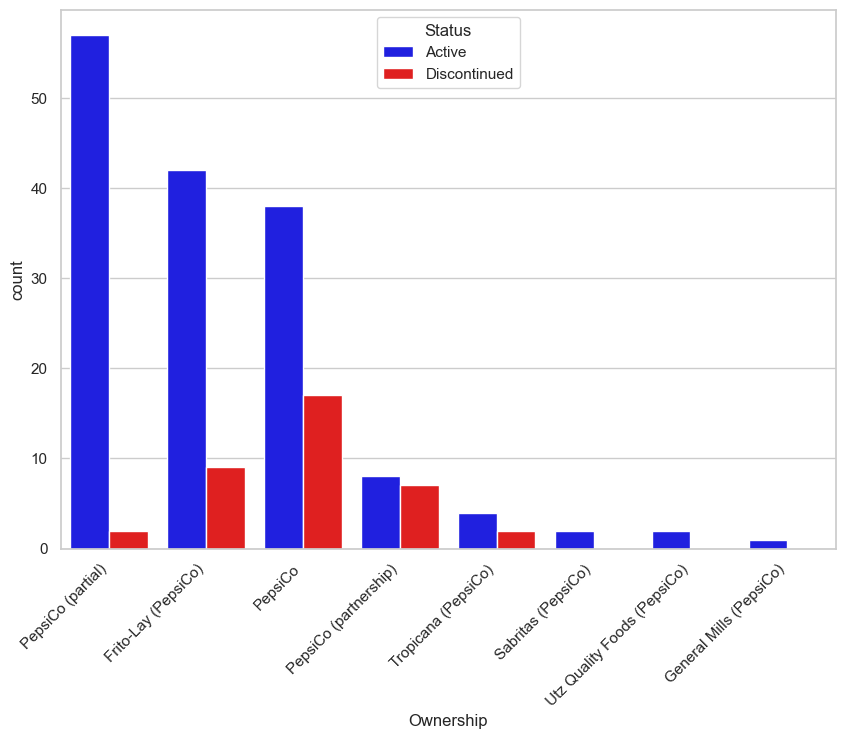

In [30]:
ownership = df[['Ownership', 'Status', 'Product Name']].groupby(['Ownership', 'Status']).agg(count = ('Product Name', 'count')).sort_values('count', ascending = False).reset_index()

plt.figure(figsize=(10, 7))
sns.set_theme(style='whitegrid', palette=('blue', 'red'))
sns.barplot(data = ownership,
           x= 'Ownership',
           y = 'count',
           hue = 'Status')

plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

In [31]:
ownership.head(20)

,Ownership,Status,count
0,PepsiCo (partial),Active,57
1,Frito-Lay (PepsiCo),Active,42
2,PepsiCo,Active,38
3,PepsiCo,Discontinued,17
4,Frito-Lay (PepsiCo),Discontinued,9
5,PepsiCo (partnership),Active,8
6,PepsiCo (partnership),Discontinued,7
7,Tropicana (PepsiCo),Active,4
8,PepsiCo (partial),Discontinued,2
9,Sabritas (PepsiCo),Active,2


In [33]:
newproducts = df[df['Year Launched'] >= 2015]
newproducts.shape

(28, 6)

In [34]:
top5new_products = newproducts[newproducts['Category'].isin(['Beverages', 'Apple Soda', 'Snack', 'Iced Tea', 'Sparkling Water'])]
top5new_products

,Product Name,Year Launched,Status,Region Served,Category,Ownership
52,Bubly,2018,Active,North America,Sparkling Water,PepsiCo
77,Ruffles Max,2020,Active,North America,Snack,Frito-Lay (PepsiCo)
78,Ruffles Max Smokehouse BBQ,2021,Active,North America,Snack,Frito-Lay (PepsiCo)
81,Lay's Mix,2015,Active,North America,Snack,Frito-Lay (PepsiCo)
97,Lay's Poppables,2017,Active,North America,Snack,Frito-Lay (PepsiCo)
105,Tostitos Cantina,2015,Discontinued,North America,Snack,Frito-Lay (PepsiCo)
113,SodaStream Pepsi,2015,Active,North America,Beverages,PepsiCo (partnership)
128,Tropicana Probiotics,2018,Active,North America,Beverages,Tropicana (PepsiCo)
133,Brisk Fusion Iced Tea,2017,Active,North America,Iced Tea,PepsiCo
134,Brisk Mate,2016,Active,North America,Iced Tea,PepsiCo


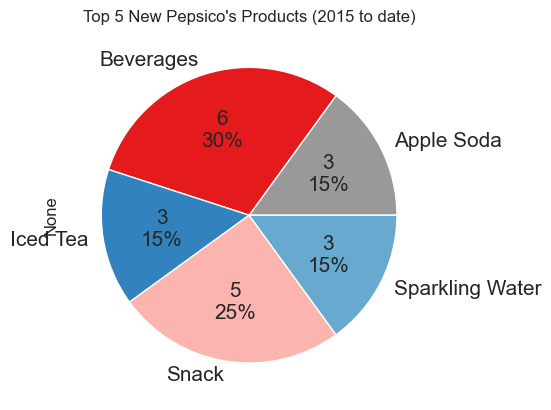

In [36]:
def label_function(val):
    return f'{val / 100 * len(top5new_products):.0f}\n{val:.0f}%'

top5new_products.groupby('Category').size().plot(kind='pie', autopct=label_function, textprops={'fontsize':15}, colors=['#999999', '#e41a1c', '#3182bd', '#fbb4ae', '#67a9cf'])

plt.title("Top 5 New Pepsico's Products (2015 to date)")
plt.show()

In [37]:
top10oldest = df.sort_values(by = 'Year Launched', ascending = True)
top10oldest = top10oldest[top10oldest['Status'] == 'Active'][0:10]
top10oldest.head(10)

,Product Name,Year Launched,Status,Region Served,Category,Ownership
41,Squamscot,1863,Active,United States (New Hampshire),Craft Soda,PepsiCo (partial)
6,Quaker Oats,1877,Active,Worldwide,Food,PepsiCo
0,Pepsi,1893,Active,Worldwide,Cola,PepsiCo
200,Cracker Jack,1896,Active,North America,Snack,Frito-Lay (PepsiCo)
43,Crush,1911,Active,North America,Fruit Flavored,PepsiCo
21,Grandma's Cookies,1914,Active,North America,Snack,PepsiCo
120,Rold Gold Pretzels,1917,Active,North America,Snack,PepsiCo (partial)
27,Rold Gold,1917,Active,North America,Snack,PepsiCo (partial)
33,Gamesa,1921,Active,Mexico,Snack,PepsiCo (partial)
7,7UP,1929,Active,Worldwide,Lemon-Lime Soda,PepsiCo


In [38]:
Centuries = df

conditions = [
    (df['Year Launched'] <= 1900),
    (df['Year Launched'] <= 2000)
]

choices = ['XIX', 'XX']
Centuries['Century'] = np.select(conditions, choices, default='XXI')

Centuries.head()

,Product Name,Year Launched,Status,Region Served,Category,Ownership,Century
0,Pepsi,1893,Active,Worldwide,Cola,PepsiCo,XIX
1,Mountain Dew,1940,Active,Worldwide,Citrus Soda,PepsiCo,XX
2,Lay's,1932,Active,Worldwide,Snack,Frito-Lay (PepsiCo),XX
3,Doritos,1964,Active,Worldwide,Snack,Frito-Lay (PepsiCo),XX
4,Tropicana,1947,Active,Worldwide,Beverages,Tropicana (PepsiCo),XX


In [39]:
Centuries = Centuries[['Century', 'Status', 'Product Name']].groupby(['Century', 'Status']).agg(count = ('Product Name', 'count')).sort_values(by = 'count', ascending = False).reset_index()

In [40]:
Centuries.head()

,Century,Status,count
0,XX,Active,85
1,XXI,Active,65
2,XXI,Discontinued,32
3,XX,Discontinued,5
4,XIX,Active,4


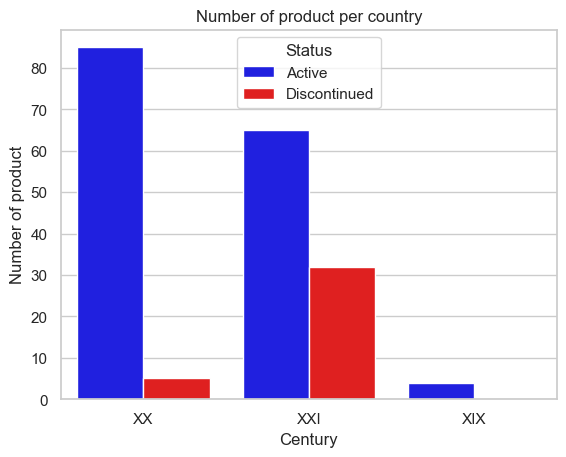

In [41]:
sns.set_theme(style='whitegrid', palette=('blue', 'red'))

sns.barplot(data = Centuries,
           x = 'Century',
           y = 'count',
           hue = 'Status')

plt.title('Number of product per country')
plt.ylabel('Number of product')

plt.show()

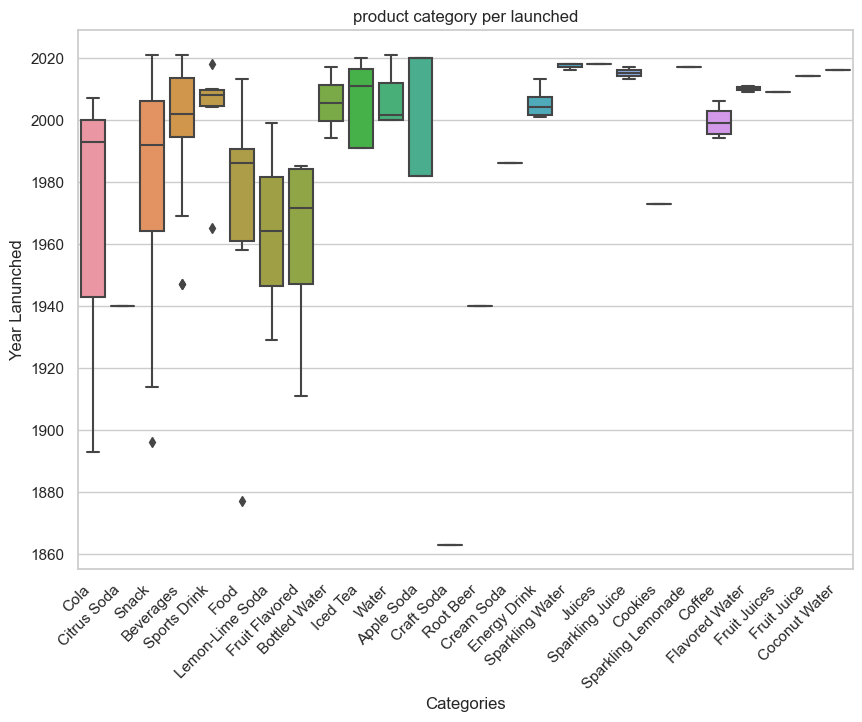

In [42]:
plt.figure(figsize=(10, 7))

sns.boxplot(data = df,
           x = 'Category',
           y = 'Year Launched')

plt.title('product category per launched')
plt.xlabel('Categories')
plt.ylabel('Year Lanunched')

plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

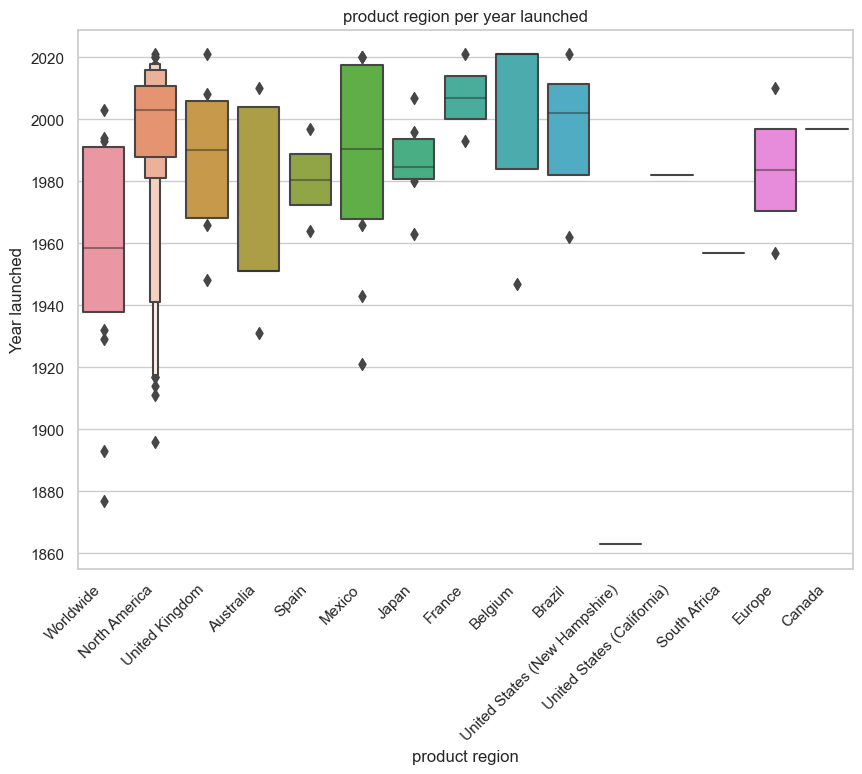

In [43]:
plt.figure(figsize=(10, 7))

sns.boxenplot(data = df,
             x = 'Region Served',
             y = 'Year Launched')

plt.title('product region per year launched')
plt.xlabel('product region')
plt.ylabel('Year launched')

plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

Conclusion

Pepsico has 154 active products (81%) out of 191.
Pepsico's top markets are North America, Mexico, United Kingdom, Japan and Australia.
Pepsico and Pepsico (partially) owns most of the products and has discontinued 19 products.
They have launched 18 new drink products in the last decade and only 7 snack products.
Pepsico's oldest product dates from 1963 and is the Squamscot.
Only five out of 90 products that were launched in the XX century are discontinued, while 32 out of 97 products that were launched in the XI century now are discontinued. In Pepsico, the old is better.